<a href="https://colab.research.google.com/github/prof-eduardo-galego/fiap-bpm-ia/blob/main/modulo_II_aprendizado_nao_supervisionado_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo II: Aprendizado Não Supervisionado - TensorFlow
Este notebook vamos conhecer o framework TensorFlow, aplicando uma descida do gradiente para montar um modelo regressivo.

Exercício extraído de https://www.tensorflow.org/guide/basics.

## Biblioteca e Módulos
Vamos utilizar a bilioteca TensorFlow para a geração do modelo e MatPlotLib para a construção dos gráficos. Segue:

In [ ]:
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt

## Dados

Neste exemplo, vamos construir os dados a partir de uma função real de segundo grau. Segue:

In [10]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

E apresentamos os dados em um gráfico:

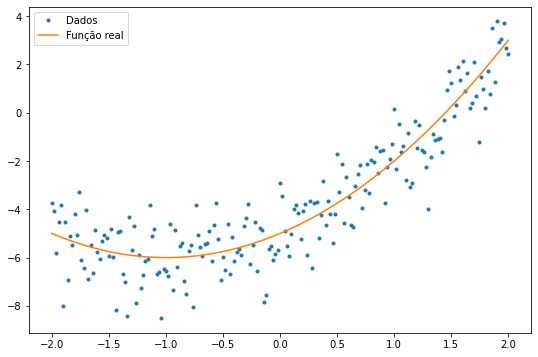

In [11]:
matplotlib.rcParams['figure.figsize'] = [9, 6]

plt.plot(x.numpy(), y.numpy(), '.', label='Dados')
plt.plot(x, f(x),  label='Função real')
plt.legend();

## Criação do Modelo

Segue o código para definição e criação de um modelo:

In [18]:
class Model(tf.keras.Model):
  def __init__(self, units):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(units=units,
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.random.normal,
                                        bias_initializer=tf.random.normal)
    self.dense2 = tf.keras.layers.Dense(1)

  def call(self, x, training=True):
    # For Keras layers/models, implement `call` instead of `__call__`.
    x = x[:, tf.newaxis]
    x = self.dense1(x)
    x = self.dense2(x)
    return tf.squeeze(x, axis=1)

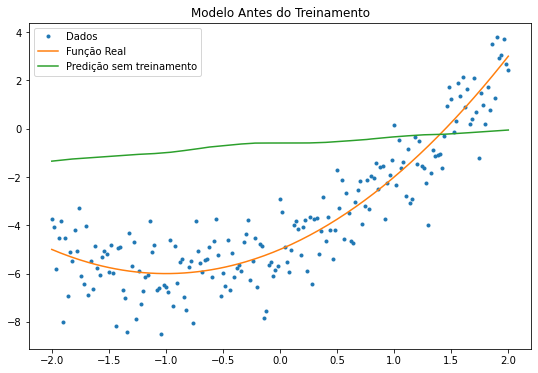

In [19]:
model = Model(64)

plt.plot(x.numpy(), y.numpy(), '.', label='Dados')
plt.plot(x, f(x),  label='Função Real')
plt.plot(x, model(x), label='Predição sem treinamento')
plt.title('Modelo Antes do Treinamento')
plt.legend();

## Treinamento

Utilizamos o algoritmo __Descida do Gradiente__, para treinar o nosso modelo. Segue: 

In [21]:
variables = model.variables

optimizer = tf.optimizers.SGD(learning_rate=0.01)

for step in range(1000):
  with tf.GradientTape() as tape:
    prediction = model(x)
    error = (y-prediction)**2
    mean_error = tf.reduce_mean(error)
  gradient = tape.gradient(mean_error, variables)
  optimizer.apply_gradients(zip(gradient, variables))

  if step % 100 == 0:
    print(f'Erro médio quadrado: {mean_error.numpy():0.3f}')

Mean squared error: 15.577
Mean squared error: 1.222
Mean squared error: 1.213
Mean squared error: 1.208
Mean squared error: 1.202
Mean squared error: 1.197
Mean squared error: 1.193
Mean squared error: 1.189
Mean squared error: 1.185
Mean squared error: 1.182


Segue o gráfico depois do treinamento:

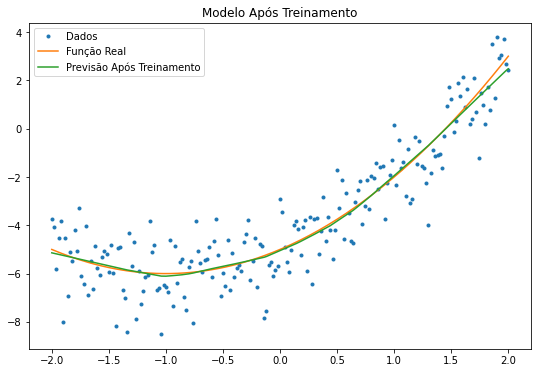

In [22]:
plt.plot(x.numpy(),y.numpy(), '.', label="Dados")
plt.plot(x, f(x),  label='Função Real')
plt.plot(x, model(x), label='Previsão Após Treinamento')
plt.title('Modelo Após Treinamento')
plt.legend();

Segue outro exemplo de treinamento, desta vez utilizando as funções do TensorFlow:

In [28]:
new_model = Model(64)
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

model.save('./my_model')

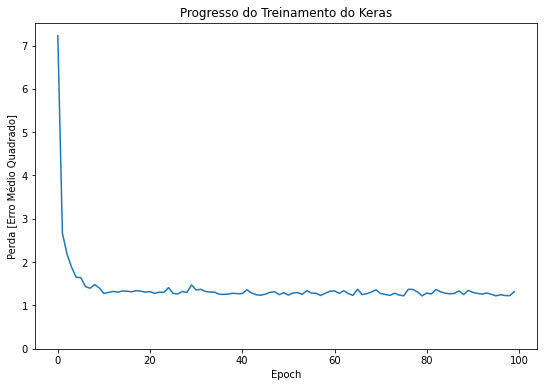

In [30]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Perda [Erro Médio Quadrado]')
plt.title('Progresso do Treinamento do Keras');

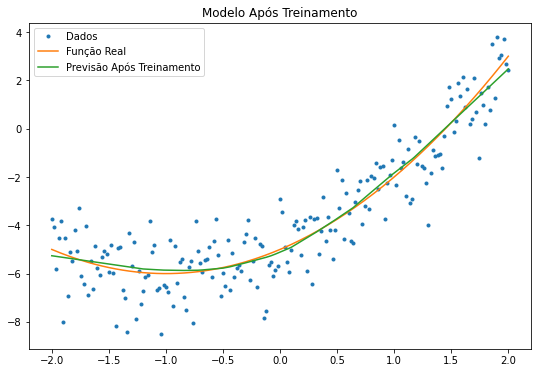

In [32]:
plt.plot(x.numpy(),y.numpy(), '.', label="Dados")
plt.plot(x, f(x),  label='Função Real')
plt.plot(x, new_model(x), label='Previsão Após Treinamento')
plt.title('Modelo Após Treinamento')
plt.legend();